In [1]:
import pandas as pd

# df_new = pd.read_csv('one_hand_data.csv')

# df_new['Mudra'] = ''

# # Assign Mudra labels based on time ranges
# time_column = df_new.columns[0]  # First column name (time)

# # Map time ranges to Mudra labels
# df_new.loc[df_new[time_column] < 32, 'Mudra'] = 'Bhumisparsa'
# df_new.loc[(df_new[time_column] >= 35) & (df_new[time_column] < 48), 'Mudra'] = 'Varada'
# df_new.loc[(df_new[time_column] >= 54) & (df_new[time_column] < 76), 'Mudra'] = 'Dhyana'
# df_new.loc[(df_new[time_column] >= 80) & (df_new[time_column] < 96), 'Mudra'] = 'Abhaya'
# df_new.loc[(df_new[time_column] >= 102) & (df_new[time_column] < 110), 'Mudra'] = 'Dharmachakra'
# df_new.loc[(df_new[time_column] >= 112) & (df_new[time_column] < 122), 'Mudra'] = 'Vitarka'
# df_new.loc[(df_new[time_column] >= 125) & (df_new[time_column] < 136), 'Mudra'] = 'Dharmachakra'
# df_new.loc[(df_new[time_column] >= 140) & (df_new[time_column] < 153), 'Mudra'] = 'Tarjani'
# df_new.loc[(df_new[time_column] >= 156) & (df_new[time_column] < 162), 'Mudra'] = 'Tarjani'
# df_new.loc[(df_new[time_column] >= 167) & (df_new[time_column] < 181), 'Mudra'] = 'Namaskara'
# df_new.loc[(df_new[time_column] >= 183) & (df_new[time_column] < 195), 'Mudra'] = 'Namaskara'
# df_new.loc[(df_new[time_column] >= 199) & (df_new[time_column] < 220), 'Mudra'] = 'Jnana'
# df_new.loc[(df_new[time_column] >= 224) & (df_new[time_column] < 243), 'Mudra'] = 'Karana'
# df_new.loc[(df_new[time_column] >= 251) & (df_new[time_column] < 270), 'Mudra'] = 'Ksepana'
# df_new.loc[(df_new[time_column] >= 278) & (df_new[time_column] < 283), 'Mudra'] = 'Ksepana'
# df_new.loc[(df_new[time_column] >= 288) & (df_new[time_column] <= 311), 'Mudra'] = 'Uttarabodhi'
# # Set any unclassified data to "Unknown"
# df_new.loc[df_new['Mudra'] == '', 'Mudra'] = 'Unknown/Transition'

# df_new.to_csv('one_hand_data+mudra_classification.csv', index=False)

In [ ]:
import pandas as pd

df_new = pd.read_csv(r'Segunda_Leva_de_dados\hand_data_02345456.csv')

df_new['Mudra'] = ''

# Assign Mudra labels based on time ranges
time_column = df_new.columns[0]  # First column name (time)

# Map time ranges to Mudra labels
df_new.loc[df_new[time_column] < 34, 'Mudra'] = 'No Mudra/No Movement/Transition'
df_new.loc[(df_new[time_column] >= 34) & (df_new[time_column] < 44), 'Mudra'] = 'Bhumisparsa'
df_new.loc[(df_new[time_column] >= 63) & (df_new[time_column] < 77), 'Mudra'] = 'Varada'
df_new.loc[(df_new[time_column] >= 102) & (df_new[time_column] < 122), 'Mudra'] = 'Dhyana'
df_new.loc[(df_new[time_column] >= 128) & (df_new[time_column] < 147), 'Mudra'] = 'Abhaya'
df_new.loc[(df_new[time_column] >= 156) & (df_new[time_column] < 177), 'Mudra'] = 'Dharmachakra'
df_new.loc[(df_new[time_column] >= 190) & (df_new[time_column] < 207), 'Mudra'] = 'Vitarka'
df_new.loc[(df_new[time_column] >= 216) & (df_new[time_column] < 236), 'Mudra'] = 'Tarjani'
df_new.loc[(df_new[time_column] >= 243) & (df_new[time_column] < 270), 'Mudra'] = 'Namaskara'
df_new.loc[(df_new[time_column] >= 275) & (df_new[time_column] < 301), 'Mudra'] = 'Jnana'
df_new.loc[(df_new[time_column] >= 305) & (df_new[time_column] < 326), 'Mudra'] = 'Karana'
df_new.loc[(df_new[time_column] >= 330) & (df_new[time_column] < 356), 'Mudra'] = 'Ksepana'
df_new.loc[(df_new[time_column] >= 361) & (df_new[time_column] < 402), 'Mudra'] = 'Uttarabodhi'
# Set any unclassified data to "Unknown"
df_new.loc[df_new['Mudra'] == '', 'Mudra'] = 'No Mudra/No Movement/Transition'

df_new.to_csv('hand_data_02345456+mudra_classification.csv', index=False)

In [ ]:
import pandas as pd

df_new = pd.read_csv(r'Segunda_Leva_de_dados\hand_data_03181866.csv')

df_new['Mudra'] = ''

# Assign Mudra labels based on time ranges
time_column = df_new.columns[0]  # First column name (time)

# Map time ranges to Mudra labels
df_new.loc[df_new[time_column] < 18, 'Mudra'] = 'No Mudra/No Movement/Transition'
df_new.loc[(df_new[time_column] >= 18) & (df_new[time_column] < 28), 'Mudra'] = 'Bhumisparsa'
df_new.loc[(df_new[time_column] >= 33) & (df_new[time_column] < 45), 'Mudra'] = 'Varada'
df_new.loc[(df_new[time_column] >= 52) & (df_new[time_column] < 62), 'Mudra'] = 'Dhyana'
df_new.loc[(df_new[time_column] >= 68) & (df_new[time_column] < 82), 'Mudra'] = 'Abhaya'
df_new.loc[(df_new[time_column] >= 90) & (df_new[time_column] < 108), 'Mudra'] = 'Dharmachakra'
df_new.loc[(df_new[time_column] >= 116) & (df_new[time_column] < 130), 'Mudra'] = 'Vitarka'
df_new.loc[(df_new[time_column] >= 137) & (df_new[time_column] < 154), 'Mudra'] = 'Tarjani'
df_new.loc[(df_new[time_column] >= 160) & (df_new[time_column] < 175), 'Mudra'] = 'Namaskara'
df_new.loc[(df_new[time_column] >= 184) & (df_new[time_column] < 200), 'Mudra'] = 'Jnana'
df_new.loc[(df_new[time_column] >= 208) & (df_new[time_column] < 222), 'Mudra'] = 'Karana'
df_new.loc[(df_new[time_column] >= 229) & (df_new[time_column] < 251), 'Mudra'] = 'Ksepana'
df_new.loc[(df_new[time_column] >= 256) & (df_new[time_column] < 290), 'Mudra'] = 'Uttarabodhi'
# Set any unclassified data to "Unknown"
df_new.loc[df_new['Mudra'] == '', 'Mudra'] = 'No Mudra/No Movement/Transition'

df_new.to_csv('hand_data_03181866+mudra_classification.csv', index=False)

In [ ]:
import pandas as pd

df_new = pd.read_csv(r'Segunda_Leva_de_dados\hand_data_02559287.csv')

df_new['Mudra'] = ''

# Assign Mudra labels based on time ranges
time_column = df_new.columns[0]  # First column name (time)

# Map time ranges to Mudra labels
df_new.loc[df_new[time_column] < 25, 'Mudra'] = 'No Mudra/No Movement/Transition'
df_new.loc[(df_new[time_column] >= 25) & (df_new[time_column] < 34), 'Mudra'] = 'Bhumisparsa'
df_new.loc[(df_new[time_column] >= 39) & (df_new[time_column] < 48), 'Mudra'] = 'Varada'
df_new.loc[(df_new[time_column] >= 54) & (df_new[time_column] < 70), 'Mudra'] = 'Dhyana'
df_new.loc[(df_new[time_column] >= 76) & (df_new[time_column] < 96), 'Mudra'] = 'Abhaya'
df_new.loc[(df_new[time_column] >= 107) & (df_new[time_column] < 122), 'Mudra'] = 'Dharmachakra'
df_new.loc[(df_new[time_column] >= 132) & (df_new[time_column] < 154), 'Mudra'] = 'Vitarka'
df_new.loc[(df_new[time_column] >= 160) & (df_new[time_column] < 182), 'Mudra'] = 'Tarjani'
df_new.loc[(df_new[time_column] >= 190) & (df_new[time_column] < 217), 'Mudra'] = 'Namaskara'
df_new.loc[(df_new[time_column] >= 220) & (df_new[time_column] < 235), 'Mudra'] = 'Jnana'
df_new.loc[(df_new[time_column] >= 242) & (df_new[time_column] < 259), 'Mudra'] = 'Karana'
df_new.loc[(df_new[time_column] >= 265) & (df_new[time_column] < 295), 'Mudra'] = 'Ksepana'
df_new.loc[(df_new[time_column] >= 300) & (df_new[time_column] < 324), 'Mudra'] = 'Uttarabodhi'
# Set any unclassified data to "Unknown"
df_new.loc[df_new['Mudra'] == '', 'Mudra'] = 'No Mudra/No Movement/Transition'

df_new.to_csv('hand_data_02559287+mudra_classification.csv', index=False)

In [ ]:
import pandas as pd

df_new = pd.read_csv(r'Segunda_Leva_de_dados\hand_data_0238023.csv')

df_new['Mudra'] = ''

# Assign Mudra labels based on time ranges
time_column = df_new.columns[0]  # First column name (time)

# Map time ranges to Mudra labels
df_new.loc[df_new[time_column] < 9, 'Mudra'] = 'No Mudra/No Movement/Transition'
df_new.loc[(df_new[time_column] >= 9) & (df_new[time_column] < 16), 'Mudra'] = 'Bhumisparsa'
df_new.loc[(df_new[time_column] >= 44) & (df_new[time_column] < 59), 'Mudra'] = 'Varada'
df_new.loc[(df_new[time_column] >= 65) & (df_new[time_column] < 77), 'Mudra'] = 'Dhyana'
df_new.loc[(df_new[time_column] >= 84) & (df_new[time_column] < 98), 'Mudra'] = 'Abhaya'
df_new.loc[(df_new[time_column] >= 105) & (df_new[time_column] < 137), 'Mudra'] = 'Dharmachakra'
df_new.loc[(df_new[time_column] >= 144) & (df_new[time_column] < 161), 'Mudra'] = 'Vitarka'
df_new.loc[(df_new[time_column] >= 168.5) & (df_new[time_column] < 194), 'Mudra'] = 'Tarjani'
df_new.loc[(df_new[time_column] >= 205) & (df_new[time_column] < 221.5), 'Mudra'] = 'Namaskara'
df_new.loc[(df_new[time_column] >= 229) & (df_new[time_column] < 251), 'Mudra'] = 'Jnana'
df_new.loc[(df_new[time_column] >= 261) & (df_new[time_column] < 287), 'Mudra'] = 'Karana'
df_new.loc[(df_new[time_column] >= 295) & (df_new[time_column] < 319), 'Mudra'] = 'Ksepana'
df_new.loc[(df_new[time_column] >= 324) & (df_new[time_column] < 353), 'Mudra'] = 'Uttarabodhi'
# Set any unclassified data to "Unknown"
df_new.loc[df_new['Mudra'] == '', 'Mudra'] = 'No Mudra/No Movement/Transition'

df_new.to_csv('hand_data_0238023+mudra_classification.csv', index=False)

In [ ]:
# df_new = pd.read_csv('two_hand_data.csv')

# df_new['Mudra'] = ''

# # Assign Mudra labels based on time ranges
# time_column = df_new.columns[0]  # First column name (time)

# # Map time ranges to Mudra labels
# df_new.loc[df_new[time_column] < 35, 'Mudra'] = 'Bhumisparsa'
# df_new.loc[(df_new[time_column] >= 35) & (df_new[time_column] < 43), 'Mudra'] = 'Varada'
# df_new.loc[(df_new[time_column] >= 44) & (df_new[time_column] < 53), 'Mudra'] = 'Dhyana'
# df_new.loc[(df_new[time_column] >= 54) & (df_new[time_column] < 61), 'Mudra'] = 'Abhaya'
# df_new.loc[(df_new[time_column] >= 62) & (df_new[time_column] < 74), 'Mudra'] = 'Dharmachakra'
# df_new.loc[(df_new[time_column] >= 75) & (df_new[time_column] < 84), 'Mudra'] = 'Vitarka'
# df_new.loc[(df_new[time_column] >= 85) & (df_new[time_column] < 95), 'Mudra'] = 'Tarjani'
# df_new.loc[(df_new[time_column] >= 96) & (df_new[time_column] < 105), 'Mudra'] = 'Namaskara'
# df_new.loc[(df_new[time_column] >= 106) & (df_new[time_column] < 119), 'Mudra'] = 'Jnana'
# df_new.loc[(df_new[time_column] >= 120) & (df_new[time_column] < 131), 'Mudra'] = 'Karana'
# df_new.loc[(df_new[time_column] >= 132) & (df_new[time_column] < 142), 'Mudra'] = 'Ksepana'
# df_new.loc[(df_new[time_column] >= 143) & (df_new[time_column] <= 150), 'Mudra'] = 'Uttarabodhi'
# # Set any unclassified data to "Unknown"
# df_new.loc[df_new['Mudra'] == '', 'Mudra'] = 'Unknown/Transition'

# df_new.to_csv('two_hand_data+mudra_classification.csv', index=False)

In [2]:
df_VR1_data = pd.read_csv(r'Segunda_Leva_de_dados\hand_data_0238023+mudra_classification.csv')
df_V3_data = pd.read_csv(r'Segunda_Leva_de_dados\hand_data_03181866+mudra_classification.csv')
df_VR4_data = pd.read_csv(r'Segunda_Leva_de_dados\hand_data_02559287+mudra_classification.csv')
df_VR5_data = pd.read_csv(r'Segunda_Leva_de_dados\hand_data_02345456+mudra_classification.csv')
df_VR2_data = pd.read_csv(r'Primeira_Leva_de_dados\one_hand_data+mudra_classification.csv')


# Combine the two dataframes
df_combined = pd.concat([df_VR1_data, df_VR2_data, df_V3_data ,df_VR4_data ,df_VR5_data], ignore_index=True)

df_combined.to_csv('combined_one_hand_data_with_classification.csv', index=False)

In [3]:
df_combined.head()

,Time,R_PositionX,R_PositionY,R_PositionZ,R_RotationX,R_RotationY,R_RotationZ,R_RotationW,R_CurlIndex,R_CurlMiddle,...,L_RotationX,L_RotationY,L_RotationZ,L_RotationW,L_CurlIndex,L_CurlMiddle,L_CurlRing,L_CurlPinky,L_CurlThumb,Mudra
0,0.238023,-0.098390,0.876473,0.346282,-0.571908,0.288743,0.187677,0.744531,5.960464e-08,0.057289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Mudra/No Movement/Transition
1,0.326114,-0.098344,0.876515,0.346253,-0.572104,0.289025,0.187642,0.744279,5.960464e-08,0.055835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Mudra/No Movement/Transition
2,0.348298,-0.098225,0.876462,0.346441,-0.572079,0.289267,0.188384,0.744017,5.960464e-08,0.056669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Mudra/No Movement/Transition
3,0.362411,-0.098106,0.876162,0.346342,-0.572386,0.288548,0.190001,0.743649,5.960464e-08,0.056844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Mudra/No Movement/Transition
4,0.375444,-0.098044,0.875967,0.346275,-0.572342,0.288593,0.190224,0.743609,5.960464e-08,0.057096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Mudra/No Movement/Transition


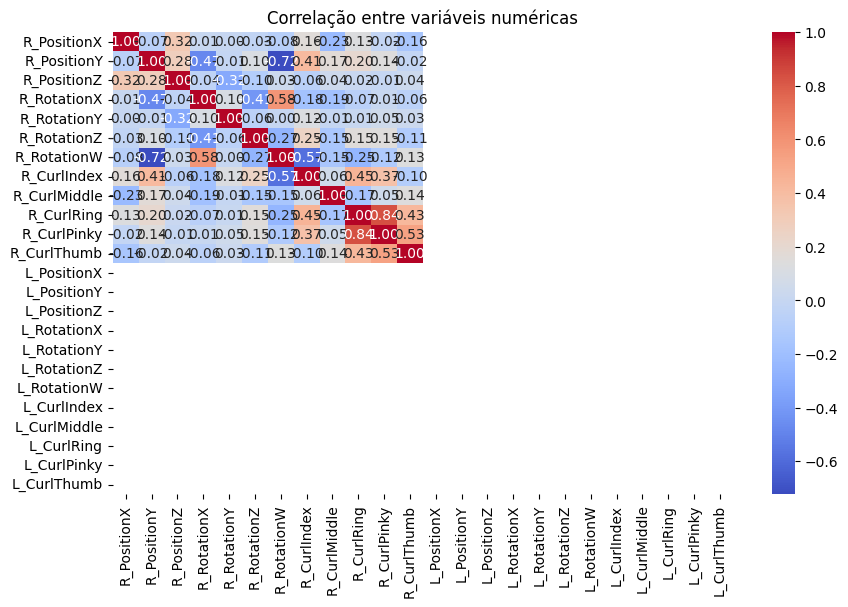

Época 0, Loss: 0.1459
Época 10, Loss: 0.1038
Época 20, Loss: 0.0723
Época 30, Loss: 0.0470
Época 40, Loss: 0.0374
Época 50, Loss: 0.0345
Época 60, Loss: 0.0329
Época 70, Loss: 0.0298
Época 80, Loss: 0.0260
Época 90, Loss: 0.0209


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_combined = pd.read_csv('combined_one_hand_data_with_classification.csv')
df_combined = df_combined.dropna(subset=['Mudra'])  # Drop rows without Mudra labels

# Drop non-numeric columns (keeping only motion data)
df_numeric = df_combined.select_dtypes(include=['number']).drop(columns=['Time'], errors='ignore')

df_numeric = df_numeric.fillna(0)  # Preencher NaN com 0, se necessário
# Visualização dos dados    

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()

# Normalizar os dados
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Converter os dados para tensores do PyTorch
X_train, X_test = train_test_split(df_normalized, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Definição do Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)  # Compressão para espaço latente
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)  # Reconstrução dos dados originais
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Criar modelo, definir otimizador e função de perda
input_dim = X_train.shape[1]
autoencoder = Autoencoder(input_dim, latent_dim=10)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Treinar o Autoencoder
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    output = autoencoder(X_train_tensor)
    loss = criterion(output, X_train_tensor)  # Comparando reconstrução com entrada
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Época {epoch}, Loss: {loss.item():.4f}')



In [5]:
# Obter a representação latente
with torch.no_grad():
    X_train_latent = autoencoder.encoder(X_train_tensor).numpy()
    X_test_latent = autoencoder.encoder(X_test_tensor).numpy()


In [6]:
# Certifique-se de que você tem rótulos
y_train, y_test = train_test_split(df_combined['Mudra'], test_size=0.2, random_state=42)

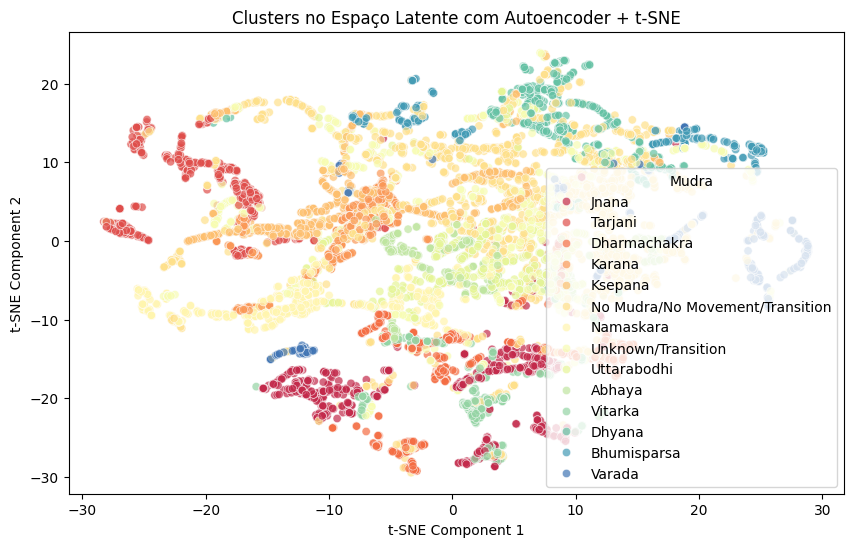

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=50, random_state=42)
X_tsne_train_latent = tsne.fit_transform(X_train_latent)
X_tsne_test_latent = tsne.fit_transform(X_test_latent)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne_test_latent[:, 0], y=X_tsne_test_latent[:, 1], hue=y_test, palette="Spectral", alpha=0.7)
plt.title("Clusters no Espaço Latente com Autoencoder + t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Certifique-se de que você tem rótulos
y_train, y_test = train_test_split(df_combined['Mudra'], test_size=0.2, random_state=42)


# Treinar o modelo
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_tsne_train_latent, y_train)

# Fazer previsões
y_pred = clf.predict(X_tsne_test_latent)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.4116672479944192
Relatório de classificação:
                                  precision    recall  f1-score   support

                         Abhaya       0.82      0.72      0.77       586
                    Bhumisparsa       0.27      0.04      0.07       399
                   Dharmachakra       0.23      0.19      0.21       683
                         Dhyana       0.63      0.12      0.20       663
                          Jnana       0.52      0.16      0.25       781
                         Karana       0.77      0.59      0.66       678
                        Ksepana       0.90      0.29      0.44       877
                      Namaskara       0.64      0.43      0.52       750
No Mudra/No Movement/Transition       0.35      0.70      0.47      2571
                        Tarjani       0.76      0.42      0.54       663
             Unknown/Transition       0.09      0.11      0.10      1047
                    Uttarabodhi       0.44      0.70      0.54   

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import joblib
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestClassifier

# df = pd.read_csv('combined_data_with_classification.csv')
# df = df.dropna(subset=['Mudra'])  # Remover linhas sem rótulos de Mudra

# # Normalizar os dados e salvar o scaler
# scaler = MinMaxScaler()
# df_normalized = scaler.fit_transform(df_numeric)
# joblib.dump(scaler, 'mudra_scaler.joblib')

# # Converter os dados para tensores do PyTorch
# X_train, X_test, y_train, y_test = train_test_split(df_normalized, df['Mudra'], test_size=0.2, random_state=42)
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# # Definição do Autoencoder
# class Autoencoder(nn.Module):
#     def __init__(self, input_dim, latent_dim=10):
#         super(Autoencoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, 64),
#             nn.ReLU(),
#             nn.Linear(64, latent_dim)  # Compressão para espaço latente
#         )
#         self.decoder = nn.Sequential(
#             nn.Linear(latent_dim, 64),
#             nn.ReLU(),
#             nn.Linear(64, input_dim)  # Reconstrução dos dados originais
#         )
    
#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

# # Criar modelo, definir otimizador e função de perda
# input_dim = X_train.shape[1]
# autoencoder = Autoencoder(input_dim, latent_dim=10)
# optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
# criterion = nn.MSELoss()

# # Treinar o Autoencoder
# epochs = 50
# for epoch in range(epochs):
#     optimizer.zero_grad()
#     output = autoencoder(X_train_tensor)
#     loss = criterion(output, X_train_tensor)  # Comparando reconstrução com entrada
#     loss.backward()
#     optimizer.step()
    
#     if epoch % 10 == 0:
#         print(f'Época {epoch}, Loss: {loss.item():.4f}')

# # Salvar o Autoencoder como um arquivo .pth
# torch.save(autoencoder.state_dict(), 'mudra_autoencoder_model.pth')

# # Extrair representações latentes
# X_train_latent = autoencoder.encoder(X_train_tensor).detach().numpy()
# X_test_latent = autoencoder.encoder(X_test_tensor).detach().numpy()

# tsne = TSNE(n_components=2, perplexity=50, random_state=42)
# X_tsne_latent = tsne.fit_transform(X_train_latent)

# # Treinar um classificador RandomForest com os dados latentes
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_tsne_latent, y_train)

# # Salvar o classificador RandomForest
# joblib.dump(clf, 'mudra_random_forest.joblib')


Época 0, Loss: 0.2517
Época 10, Loss: 0.1979
Época 20, Loss: 0.1361
Época 30, Loss: 0.0896
Época 40, Loss: 0.0709


['mudra_random_forest.joblib']